<a href="https://colab.research.google.com/github/VivekShahare04/Resume-Screening-App/blob/main/resumescreening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('UpdatedResumeDataSet.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [3]:
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [4]:
df.shape

(962, 2)

In [5]:
df.describe()

,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


In [6]:
df['Category'].value_counts()

,count
Category,
Java Developer,84
Testing,70
DevOps Engineer,55
Python Developer,48
Web Designing,45
HR,44
Hadoop,42
Sales,40
Data Science,40


<Axes: xlabel='count', ylabel='Category'>

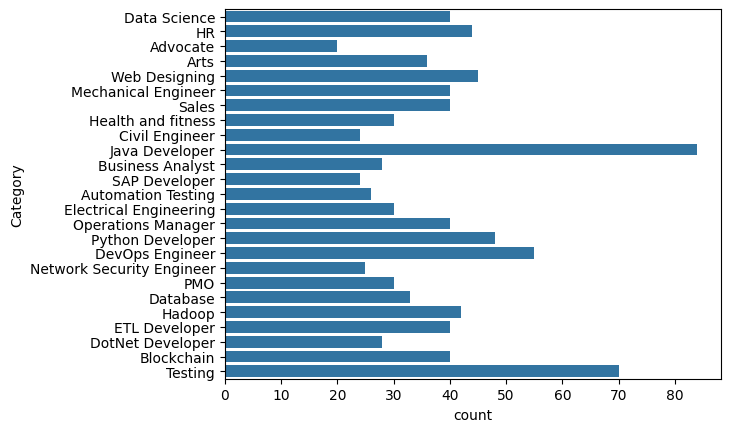

In [7]:
sns.countplot(df['Category'])

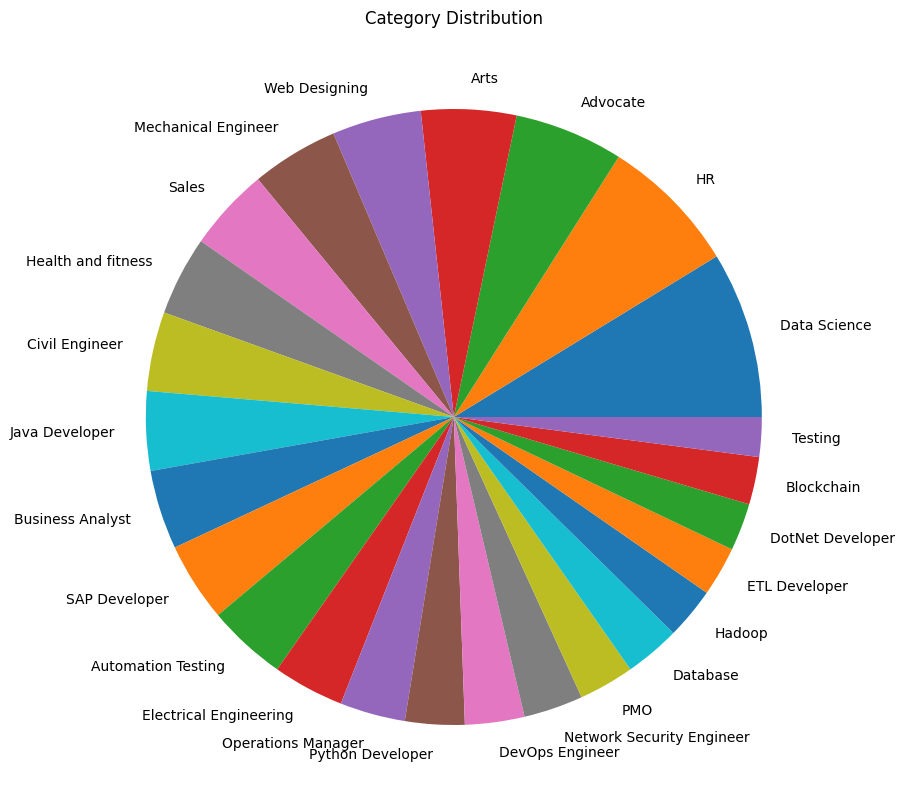

In [8]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(10, 10))
plt.pie(counts, labels=labels)
plt.title('Category Distribution')
plt.show()

In [9]:
#Cleaning Data

In [10]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [11]:
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText)
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

In [12]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [13]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

In [14]:
#words into categorical values

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])

In [16]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [17]:
#Vectorization

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
x = tf.fit_transform(df['Resume'])
y = df['Category']

In [19]:
x

<962x7566 sparse matrix of type '<class 'numpy.float64'>'
	with 186888 stored elements in Compressed Sparse Row format>

In [20]:
y.head()

,Category
0,6
1,6
2,6
3,6
4,6


In [21]:
#splitting in training and test model

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(769, 7566)
(193, 7566)
(769,)
(193,)


In [23]:
#Now let’s train the model and print the classification report:

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(x_train,y_train)
ypred = clf.predict(x_test)
print(accuracy_score(y_test,ypred))

0.9844559585492227


In [25]:
ypred

array([15, 15, 15, 13, 14, 17, 16,  2,  0, 14, 13, 12, 16, 23, 20,  5,  6,
        4, 10,  9, 19,  1, 10, 23, 23, 21, 22, 22,  2, 12, 18,  1,  8, 24,
       11, 23,  7, 12, 24,  8, 18,  6,  8, 19, 24, 23, 21,  1, 15,  4, 15,
       22, 11,  5, 15, 13,  1, 19,  5, 12, 22, 22, 20, 24, 21, 18, 12, 10,
       10, 20, 10,  8,  9, 21, 17, 21,  0, 17, 16, 14, 15, 11, 11,  8, 20,
        3, 19,  8,  0,  2,  9, 10,  2, 23, 20, 20, 23, 12, 18, 12,  7, 16,
        8, 14, 18,  3, 14, 19, 14, 14, 15, 18,  8,  2, 21, 18, 23, 10, 23,
        5, 11, 15, 12,  3,  5,  3,  7, 12, 19,  8, 20, 19,  3, 15,  9, 19,
        1, 23, 21,  5, 20, 15, 16,  7,  7,  8, 15, 18,  1, 15, 13, 20,  7,
        4, 18, 11,  5, 15,  5, 12,  9, 22, 18, 21,  8, 23,  4, 12, 24, 16,
       15, 22,  8, 22,  3, 16, 23, 23, 12,  7, 16, 18,  5,  3, 18,  8, 23,
       23, 20, 21,  6,  7, 23])

In [26]:
#prediction


In [27]:
import pickle
pickle.dump(tf,open('tfidf.pkl','wb'))
pickle.dump(clf, open('clf.pkl', 'wb'))

In [31]:
myresume="""
I.T. Skills Ã¢Â€Â¢ Windows XP, Ms Office (Word, Excel: Look-ups; Pivot table; other basic functions ; Power Point) Ã¢Â€Â¢ Saral Payment Package- payroll software Ã¢Â€Â¢ Internet ApplicationsEducation Details
January 2006 Bachelor in Hospitality Management International Hospitality Management  Queen Margaret University Edinburg
January 2006 diploma Hotel Management  International Institute of Hotel Management
HR


Skill Details
Hr Management- Exprience - Less than 1 year monthsCompany Details
company - Atri Developers
description - Ã¢Â€Â¢ HR Payroll Statutory Compliance Performance Management
company -
description - Employee Relations and Administration: Creating industry specific Policies, Procedure, Forms, Formats, Letters, Checklists etc

Payroll Management: Salary restructuring to process payroll of 600 employees.
Ã¢Â€Â¢ Validation of all input (Attendance, Leaves, and Salaries) before starting salary process.
Ã¢Â€Â¢ Processing accurate & error free salary of employees.
Ã¢Â€Â¢ Responsible for compensation and benefits administration.
Ã¢Â€Â¢ Coordinate with Accounts team for salary processing.
Ã¢Â€Â¢ Attendance & Leave record management
Ã¢Â€Â¢ Assuring prompt and satisfactory resolution of payroll related queries of all employees.

Statutory Compliance Management:
Ã¢Â€Â¢  Manage various statutory compliance requirements (PF, ESIC, PT, Gratuity, TDS etc calculations, deduction, payment and return filing.
Ã¢Â€Â¢ Generate statutory reports like Form 16, Form 24Q. Conducting session with employees on Statutory Policies and procedure, compliance related topics.
Ã¢Â€Â¢ Shops and Commercial Establishments Act (S&E)
Ã¢Â€Â¢ The Payment of Gratuity Act 1972
Recruitment and Selection: Handling recruitment like job posting in naukri portal and coordination. Create annual manpower plan and budget. Screen and schedule preliminary interview. Arrange for employee orientation. Handling joining formalities and salary account opening formalities.

Performance Management: End to end facilitation of PMS starting from creating Job Description & Appraisal Forms to Disbursement of Letters. KRA setting, Mid-year reviews, Annual reviews, handling all appraisal activities (360 Degree)

Training and Development: Conduct training need analysis and arrange various training session.

Employee engagement and  Employee Welfare: Creation and deployment  of Sales  Rewards and Recognition Schemes, Periodic Interactive sessions like Monthly Birthday Celebration, Annual Day, Diwali Dhamaka, Offsite etc.
Working on Saral Payment Package- payroll software as well as on excel
Assisting MD in HR works, offering suggestions and answering employee queries on payroll compliance related issues, other benefits (insurance, medical, reimbursement, ), full & final settlement of resigned employees.
"""

In [32]:
import pickle

# Load the trained classifier
clf = pickle.load(open('clf.pkl', 'rb'))

# Clean the input resume
cleaned_resume = cleanResume(myresume)

# Transform the cleaned resume using the trained TfidfVectorizer
input_features = tf.transform([cleaned_resume])

# Make the prediction using the loaded classifier
prediction_id = clf.predict(input_features)[0]

# Map category ID to category name
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", category_name)
print(prediction_id)

Predicted Category: HR
12
